**Import các thư viện cần thiết**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Đọc dữ liệu và biểu diễn trực quan hóa dữ liệu**

In [ ]:
df = pd.read_csv('all-data.csv', names = ['labels','messages'], encoding='ISO-8859-1')
df.head()

,labels,messages
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [ ]:
# Kiểm tra xem có tồn tại missing values hay không?
df.isnull().sum()

labels      0
messages    0
dtype: int64

In [ ]:
# Kiểm tra shape của dữ liệu
df.shape

(4846, 2)

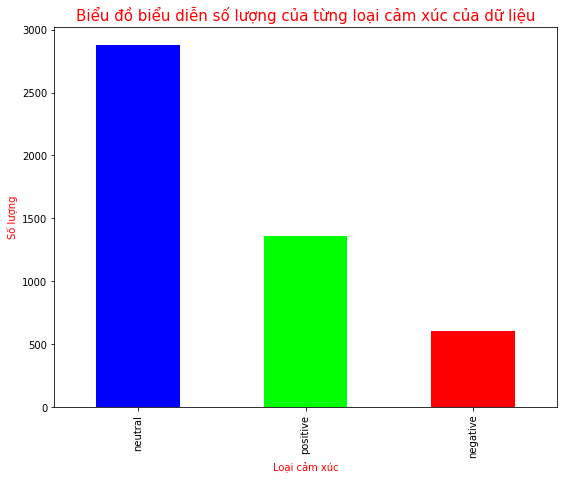

In [ ]:
plt.figure(figsize=(9,7))
df.labels.value_counts().plot(kind='bar',color=['blue','lime','red'])
plt.xlabel("Loại cảm xúc", color = 'r')
plt.ylabel("Số lượng", color = 'r')
plt.title("Biểu đồ biểu diễn số lượng của từng loại cảm xúc của dữ liệu", color = 'r', fontsize = 15);

**Chuyển đổi labels sang dạng số (Neutral: 0; Negative: 1; Positive: 2)**

In [ ]:
def func(df_new):
    if df_new == 'neutral':
        return 0
    elif df_new == 'negative':
        return 1
    else:
        return 2
df['target'] = df.labels.apply(func)
df.head()

,labels,messages,target
0,neutral,"According to Gran , the company has no plans t...",0
1,neutral,Technopolis plans to develop in stages an area...,0
2,negative,The international electronic industry company ...,1
3,positive,With the new production plant the company woul...,2
4,positive,According to the company 's updated strategy f...,2


**Text Preprocessing**

In [ ]:
# Text preprocessing
corpous = list()

# Object for porterstem
ps = PorterStemmer()

for i in range(len(df)):
    text = re.sub(r'[^a-zA-Z]',' ',df.messages[i]) 
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if word not in set(stopwords.words('english'))]
    text = ' '.join(text)
    corpous.append(text)

In [ ]:
print(corpous)

['accord gran compani plan move product russia although compani grow', 'technopoli plan develop stage area less squar meter order host compani work comput technolog telecommun statement said', 'intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier layoff compani contract rank offic worker daili postime report', 'new product plant compani would increas capac meet expect increas demand would improv use raw materi therefor increas product profit', 'accord compani updat strategi year baswar target long term net sale growth rang oper profit margin net sale', 'financ aspocomp growth aspocomp aggress pursu growth strategi increasingli focus technolog demand hdi print circuit board pcb', 'last quarter componenta net sale doubl eur eur period year earlier move zero pre tax profit pre tax loss eur', 'third quarter net sale increas eur mn oper profit eur mn', 'oper profit rose eur mn eur mn correspond period repres net sale', 'oper profit total eur mn eur mn rep

**Xây dựng danh sách các từ phổ biến nhất**

In [ ]:
word2count = {}
for data in corpous:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [ ]:
print(word2count)

{'accord': 135, 'gran': 2, 'compani': 973, 'plan': 111, 'move': 32, 'product': 326, 'russia': 86, 'although': 3, 'grow': 30, 'technopoli': 17, 'develop': 212, 'stage': 11, 'area': 96, 'less': 12, 'squar': 25, 'meter': 7, 'order': 150, 'host': 6, 'work': 71, 'comput': 16, 'technolog': 152, 'telecommun': 20, 'statement': 27, 'said': 545, 'intern': 54, 'electron': 73, 'industri': 157, 'elcoteq': 39, 'laid': 10, 'ten': 15, 'employe': 90, 'tallinn': 14, 'facil': 70, 'contrari': 1, 'earlier': 87, 'layoff': 9, 'contract': 178, 'rank': 4, 'offic': 77, 'worker': 15, 'daili': 16, 'postime': 1, 'report': 169, 'new': 277, 'plant': 148, 'would': 92, 'increas': 227, 'capac': 52, 'meet': 45, 'expect': 142, 'demand': 36, 'improv': 65, 'use': 128, 'raw': 21, 'materi': 48, 'therefor': 7, 'profit': 432, 'updat': 11, 'strategi': 38, 'year': 446, 'baswar': 44, 'target': 57, 'long': 58, 'term': 80, 'net': 414, 'sale': 503, 'growth': 66, 'rang': 40, 'oper': 579, 'margin': 29, 'financ': 34, 'aspocomp': 26, 'a

In [ ]:
print(len(word2count))

6696


In [ ]:
#Giới hạn 500 từ phổ biến nhất để đảm bảo tốc độ thực thi thuật toán chấp nhận được, 
#nếu giữ nguyên 6696 từ sẽ gặp vấn đề về thời gian thực thi thuật toán.
import heapq
freq_words = heapq.nlargest(500, word2count, key=word2count.get)

In [ ]:
print(freq_words)

['eur', 'compani', 'mn', 'oper', 'said', 'finnish', 'sale', 'year', 'million', 'share', 'profit', 'net', 'finland', 'servic', 'group', 'product', 'market', 'busi', 'mln', 'new', 'period', 'quarter', 'total', 'euro', 'oyj', 'increas', 'also', 'develop', 'includ', 'first', 'contract', 'solut', 'helsinki', 'report', 'invest', 'compar', 'manag', 'provid', 'bank', 'base', 'loss', 'industri', 'corpor', 'manufactur', 'unit', 'technolog', 'order', 'today', 'plant', 'mobil', 'custom', 'expect', 'nokia', 'system', 'financi', 'per', 'accord', 'use', 'percent', 'correspond', 'project', 'agreement', 'result', 'hel', 'price', 'build', 'v', 'construct', 'valu', 'month', 'one', 'capit', 'plan', 'well', 'end', 'network', 'start', 'stock', 'rose', 'part', 'pct', 'board', 'paper', 'oy', 'area', 'offer', 'announc', 'second', 'januari', 'two', 'equip', 'would', 'usd', 'process', 'continu', 'omx', 'employe', 'decreas', 'gener', 'estim', 'earlier', 'sign', 'septemb', 'russia', 'line', 'third', 'design', 'las

In [ ]:
print(len(freq_words))

500


**Xây dựng mô hình Bag of Words (BOW)**

In [ ]:
X = []
for data in corpous:
    vector = []
    for word in freq_words:
        if word in nltk.word_tokenize(data):
            vector.append(1)
        else:
            vector.append(0)
    X.append(vector)
X = np.asarray(X)

In [ ]:
print(X)

[[0 1 0 ... 0 0 0]
 [0 1 0 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(len(X))

4846


**Chuẩn bị tập dữ liệu train và tập dữ liệu test**

In [ ]:
y = df.target

In [ ]:
print(y)

0       0
1       0
2       1
3       2
4       2
       ..
4841    1
4842    0
4843    1
4844    1
4845    1
Name: target, Length: 4846, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

**Tiến hành phân lớp dữ liệu với mô hình SVM và Logistic Regression**

In [ ]:
import nltk.metrics
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from nltk.metrics import ConfusionMatrix
from nltk.metrics.scores import (precision, recall)

In [ ]:
# Xây dựng mô hình Logistic Regression
lr = LogisticRegression(max_iter=300)

lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)

In [ ]:
cm = ConfusionMatrix(y_test, lr_pred)
print(cm)

  |   0   1   2   3   4 |
--+---------------------+
0 |<502> 12  56   .   . |
1 |  46 <51> 16   .   . |
2 | 106  11<170>  .   . |
3 |   .   .   .  <.>  . |
4 |   .   .   .   .  <.>|
--+---------------------+
(row = reference; col = test)



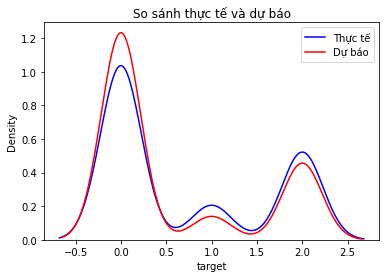

In [ ]:
sns.kdeplot(data = y_test, color="b", label = "Thực tế")
sns.kdeplot(data = lr_pred, color="r", label = "Dự báo")
plt.title('So sánh thực tế và dự báo')
plt.legend()
plt.show()

In [ ]:
accuracy_score1 = nltk.accuracy(y_test, lr_pred)
print("Accuracy of model ",accuracy_score1)

Accuracy of model  0.7453608247422681


In [ ]:
svc = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

svc.fit(X_train,y_train)

svc_pred = svc.predict(X_test)

In [ ]:
cm = ConfusionMatrix(y_test, svc_pred)
print(cm)

  |   0   1   2   3   4 |
--+---------------------+
0 |<497> 17  56   .   . |
1 |  47 <48> 18   .   . |
2 | 110  16<161>  .   . |
3 |   .   .   .  <.>  . |
4 |   .   .   .   .  <.>|
--+---------------------+
(row = reference; col = test)



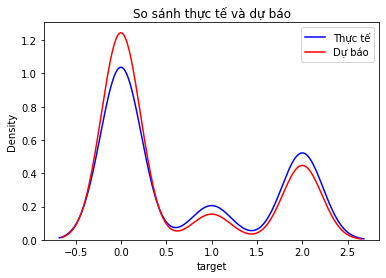

In [ ]:
sns.kdeplot(data = y_test, color="b", label = "Thực tế")
sns.kdeplot(data = svc_pred, color="r", label = "Dự báo")
plt.title('So sánh thực tế và dự báo')
plt.legend()
plt.show()

In [ ]:
accuracy_score2 = nltk.accuracy(y_test, svc_pred)
print("Accuracy of model ",accuracy_score2)

Accuracy of model  0.7278350515463917


In [ ]:
table = {'Logistic Regression':accuracy_score1, 'SVC':accuracy_score2}
dftable = pd.DataFrame(table, index = ['Accuracy Score'])
print(dftable)

                Logistic Regression       SVC
Accuracy Score             0.745361  0.727835


**Xây dựng hàm đánh giá Precision, Recall và F1-score**

Xây dựng các hàm tính toán True Positives, True Negatives, False Positives and False Negatives

In [ ]:
def true_positive(y_true, y_pred):   
    tp = 0   
    for yt, yp in zip(y_true, y_pred):       
        if yt == 1 and yp == 1:
            tp += 1    
    return tp

def true_negative(y_true, y_pred):   
    tn = 0   
    for yt, yp in zip(y_true, y_pred):       
        if yt == 0 and yp == 0:
            tn += 1          
    return tn

def false_positive(y_true, y_pred):   
    fp = 0    
    for yt, yp in zip(y_true, y_pred):       
        if yt == 0 and yp == 1:
            fp += 1           
    return fp

def false_negative(y_true, y_pred):   
    fn = 0   
    for yt, yp in zip(y_true, y_pred):        
        if yt == 1 and yp == 0:
            fn += 1           
    return fn

**Macro-averaged Precision**

In [ ]:
def macro_precision(y_true, y_pred):

    # Xác định số lượng lớp
    num_classes = len(np.unique(y_true))

    # Khởi tạo precision = 0
    precision = 0
    
    # Duyệt qua từng lớp
    for class_ in list(y_true.unique()):
        
        # Tất cả các lớp ngoại trừ lớp hiện tại được coi là negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        
        # Tính toán true positive cho lớp hiện tại
        tp = true_positive(temp_true, temp_pred)
        
        # Tính toán false positive cho lớp hiện tại
        fp = false_positive(temp_true, temp_pred)
        
        
        # Tính toán precision cho lớp hiện tại
        temp_precision = tp / (tp + fp + 1e-6)
        precision += temp_precision
        
    # Tính toán và trả về precision trung bình trên tất cả các lớp
    precision /= num_classes
    
    return precision

In [ ]:
print(f"Macro-averaged Precision score for Logistic Regression : {macro_precision(y_test, lr_pred) }")
print(f"Macro-averaged Precision score for SVM : {macro_precision(y_test, svc_pred) }")

Macro-averaged Precision score for Logistic Regression : 0.7197508708338805
Macro-averaged Precision score for SVM : 0.679212600699505


In [ ]:
#Kiểm tra lại kết quả tính toán với hàm Precision của sklearn
lr_precision_macro = metrics.precision_score(y_test, lr_pred, average = 'macro')
svc_precision_macro = metrics.precision_score(y_test, svc_pred, average = 'macro')
print(f"Macro-averaged Precision score for Logistic Regression : {lr_precision_macro}")
print(f"Macro-averaged Precision score for SVM : {svc_precision_macro}")

Macro-averaged Precision score for Logistic Regression : 0.7197508752971639
Macro-averaged Precision score for SVM : 0.6792126044972685


**Micro-averaged Precision**

In [ ]:
def micro_precision(y_true, y_pred):

    # Xác định số lượng lớp
    num_classes = len(np.unique(y_true))
    
    tp = 0
    fp = 0
    
    # Duyệt qua từng lớp
    for class_ in y_true.unique():
        
        # Tất cả các lớp ngoại trừ lớp hiện tại được coi là negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # Tính toán true positive cho lớp hiện tại
        # và cập nhật overall tp
        tp += true_positive(temp_true, temp_pred)
        
        # Tính toán false positive cho lớp hiện tại
        # và cập nhật overall fp
        fp += false_positive(temp_true, temp_pred)
        
    # Tính toán và trả về overall precision
    precision = tp / (tp + fp)
    return precision

In [ ]:
print(f"Micro-averaged Precision score for Logistic Regression : {micro_precision(y_test, lr_pred)}")
print(f"Micro-averaged Precision score for SVM : {micro_precision(y_test, svc_pred)}")

Micro-averaged Precision score for Logistic Regression : 0.7453608247422681
Micro-averaged Precision score for SVM : 0.7278350515463917


In [ ]:
#Kiểm tra lại kết quả tính toán với hàm Precision của sklearn
lr_precision_micro = metrics.precision_score(y_test, lr_pred, average = 'micro')
svc_precision_micro = metrics.precision_score(y_test, svc_pred, average = 'micro')
print(f"Micro-averaged Precision score for Logistic Regression : {lr_precision_micro}")
print(f"Micro-averaged Precision score for SVM : {svc_precision_micro}")

Micro-averaged Precision score for Logistic Regression : 0.7453608247422681
Micro-averaged Precision score for SVM : 0.7278350515463917


**Macro-averaged recall**

In [ ]:
def macro_recall(y_true, y_pred):

    # Xác định số lượng lớp
    num_classes = len(np.unique(y_true))

    # Khởi tạo recall = 0
    recall = 0
    
    # Duyệt qua từng lớp
    for class_ in list(y_true.unique()):
        
        # Tất cả các lớp ngoại trừ lớp hiện tại được coi là negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        
        # Tính toán true positive cho lớp hiện tại
        tp = true_positive(temp_true, temp_pred)
        
        # Tính toán false positive cho lớp hiện tại
        fn = false_negative(temp_true, temp_pred)
        
        
        # Tính toán recall cho lớp hiện tại
        temp_recall = tp / (tp + fn + 1e-6)
        recall += temp_recall
        
    # Tính toán và trả về recall trung bình trên tất cả các lớp
    recall /= num_classes
    
    return recall

In [ ]:
print(f"Macro-averaged recall score for Logistic Regression : {macro_recall(y_test, lr_pred)}")
print(f"Macro-averaged recall score for SVM : {macro_recall(y_test, svc_pred)}")

Macro-averaged recall score for Logistic Regression : 0.6414545583949268
Macro-averaged recall score for SVM : 0.6192280627120078


In [ ]:
#Kiểm tra lại kết quả tính toán với hàm Recall của sklearn
lr_recall_macro = metrics.recall_score(y_test, lr_pred, average = 'macro')
svc_recall_macro = metrics.recall_score(y_test, svc_pred, average = 'macro')
print(f"Macro-averaged recall score for Logistic Regression : {lr_recall_macro}")
print(f"Macro-averaged recall score for SVM : {svc_recall_macro}")

Macro-averaged recall score for Logistic Regression : 0.6414545609292676
Macro-averaged recall score for SVM : 0.6192280651264827


**Micro-averaged recall**

In [ ]:
def micro_recall(y_true, y_pred):

    # Xác định số lượng lớp 
    num_classes = len(np.unique(y_true))
    
    tp = 0
    fn = 0
    
    # Duyệt qua từng lớp
    for class_ in y_true.unique():
        
        # Tất cả các lớp ngoại trừ lớp hiện tại được coi là negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # Tính toán true positive cho lớp hiện tại
        # và cập nhật overall tp
        tp += true_positive(temp_true, temp_pred)
        
        # Tính toán false positive cho lớp hiện tại
        # và cập nhật overall tp
        fn += false_negative(temp_true, temp_pred)
        
    # Tính toán và trả về overall recall
    recall = tp / (tp + fn)
    return recall

In [ ]:
print(f"Micro-averaged recall score for Logistic Regression : {micro_recall(y_test, lr_pred)}")
print(f"Micro-averaged recall score for SVM : {micro_recall(y_test, svc_pred)}")

Micro-averaged recall score for Logistic Regression : 0.7453608247422681
Micro-averaged recall score for SVM : 0.7278350515463917


In [ ]:
#Kiểm tra lại kết quả tính toán với hàm Recall của sklearn
lr_recall_micro = metrics.recall_score(y_test, lr_pred, average = 'micro')
svc_recall_micro = metrics.recall_score(y_test, svc_pred, average = 'micro')
print(f"Micro-averaged recall score for Logistic Regression : {lr_recall_micro}")
print(f"Micro-averaged recall score for SVM : {svc_recall_micro}")

Micro-averaged recall score for Logistic Regression : 0.7453608247422681
Micro-averaged recall score for SVM : 0.7278350515463917


**Macro-averaged f1 score**

In [ ]:
def macro_f1(y_true, y_pred):

    # Xác định số lượng lớp
    num_classes = len(np.unique(y_true))

    # Khởi tạo f1 = 0
    f1 = 0
    
    # Duyệt qua từng lớp
    for class_ in list(y_true.unique()):
        
        # Tất cả các lớp ngoại trừ lớp hiện tại được coi là negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        
        # Tính toán true positive cho lớp hiện tại
        tp = true_positive(temp_true, temp_pred)
        
        # Tính toán false negative cho lớp hiện tại
        fn = false_negative(temp_true, temp_pred)
        
        # Tính toán false positive cho lớp hiện tại
        fp = false_positive(temp_true, temp_pred)
        
        
        # Tính toán recall cho lớp hiện tại
        temp_recall = tp / (tp + fn + 1e-6)
        
        # Tính toán precision cho lớp hiện tại
        temp_precision = tp / (tp + fp + 1e-6)

        #Tính toán f1-score cho lớp hiện tại        
        temp_f1 = 2 * temp_precision * temp_recall / (temp_precision + temp_recall + 1e-6)      
        f1 += temp_f1
        
    # Tính toán và trả về f1-score trung bình trên tất cả các lớp
    f1 /= num_classes
    
    return f1

In [ ]:
print(f"Macro-averaged f1-score for Logistic Regression : {macro_f1(y_test, lr_pred)}")
print(f"Macro-averaged f1-score for SVM : {macro_f1(y_test, svc_pred)}")

Macro-averaged f1-score for Logistic Regression : 0.6694788728944173
Macro-averaged f1-score for SVM : 0.641264537923507


In [ ]:
#Kiểm tra lại kết quả tính toán với hàm Recall của sklearn
lr_f1_macro = metrics.f1_score(y_test, lr_pred, average = 'macro')
svc_f1_macro = metrics.f1_score(y_test, svc_pred, average = 'macro')
print(f"Macro-averaged f1-score for Logistic Regression : {lr_f1_macro}")
print(f"Macro-averaged f1-score for SVM : {svc_f1_macro}")

Macro-averaged f1-score for Logistic Regression : 0.6694793668551036
Macro-averaged f1-score for SVM : 0.641265033880203


**Micro-averaged f1 score**

In [ ]:
def micro_f1(y_true, y_pred):

    #micro-averaged precision score
    P = micro_precision(y_true, y_pred)

    #micro-averaged recall score
    R = micro_recall(y_true, y_pred)

    #micro averaged f1 score
    f1 = 2*P*R / (P + R)    

    return f1

In [ ]:
print(f"Micro-averaged f1-score for Logistic Regression : {micro_f1(y_test, lr_pred)}")
print(f"Micro-averaged f1-score for SVM : {micro_f1(y_test, svc_pred)}")

Micro-averaged f1-score for Logistic Regression : 0.7453608247422681
Micro-averaged f1-score for SVM : 0.7278350515463918


In [ ]:
#Kiểm tra lại kết quả tính toán với hàm Recall của sklearn
lr_f1_micro = metrics.f1_score(y_test, lr_pred, average = 'micro')
svc_f1_micro = metrics.f1_score(y_test, svc_pred, average = 'micro')
print(f"Micro-averaged f1-score for Logistic Regression : {lr_f1_micro}")
print(f"Micro-averaged f1-score for SVM : {svc_f1_micro}")

Micro-averaged f1-score for Logistic Regression : 0.7453608247422681
Micro-averaged f1-score for SVM : 0.7278350515463918


**Bảng tổng hợp Precision, Recall và F1-score**

In [ ]:
models = ['Logistic Regression', 'SVM']

precision_macro = [lr_precision_macro, svc_precision_macro]
precision_micro = [lr_precision_micro, svc_precision_micro]

recall_macro = [lr_recall_macro, svc_recall_macro]
recall_micro = [lr_recall_micro, svc_recall_micro]

f1_marco = [lr_f1_macro, svc_f1_macro]
f1_mirco = [lr_f1_micro, svc_f1_micro]

table = pd.DataFrame({'Model': models, 'Precision_macro': precision_macro, 'Precision_micro': precision_micro
                  , 'Recall_macro': recall_macro, 'Recall_micro': recall_micro, 'F1_marco': f1_marco,
                   'F1_mirco': f1_mirco})
print(table)

                 Model  Precision_macro  Precision_micro  Recall_macro  \
0  Logistic Regression         0.719751         0.745361      0.641455   
1                  SVM         0.679213         0.727835      0.619228   

   Recall_micro  F1_marco  F1_mirco  
0      0.745361  0.669479  0.745361  
1      0.727835  0.641265  0.727835  


In [ ]:
series = pd.DataFrame(lr_pred, columns = ["Sentiment"])

In [ ]:
print(series)

     Sentiment
0            0
1            2
2            0
3            2
4            0
..         ...
965          0
966          2
967          2
968          0
969          0

[970 rows x 1 columns]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


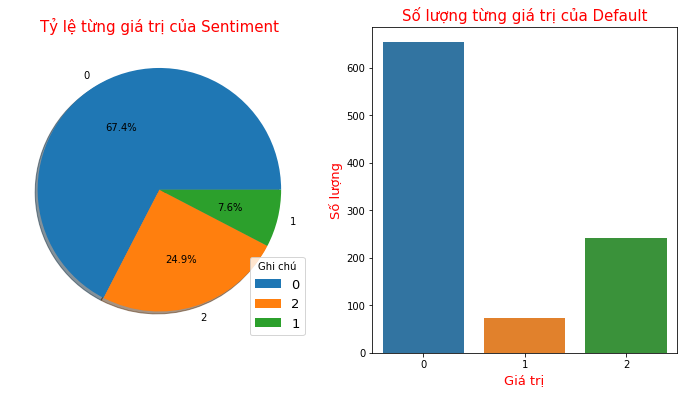

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,6))
series['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Tỷ lệ từng giá trị của Sentiment', color = 'Red', fontsize = '15')
ax[0].set_ylabel('')
ax[0].legend(title = 'Ghi chú', fontsize = 13, loc = 'lower right')
sns.countplot('Sentiment',data=series,ax=ax[1])
ax[1].set_title('Số lượng từng giá trị của Default', color = 'Red', fontsize = '15')
ax[1].set_xlabel('Giá trị', color = 'Red', fontsize = '13')
ax[1].set_ylabel('Số lượng', color = 'Red', fontsize = '13')
plt.show()